#Introducción al aprendizaje computacional (Machine Learning):
## Utilizando la librería scikitlearn

Este taller guiado tiene como objetivo hacer un primer acercamiento práctico acerca del aprendizaje computacional  con Python. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* crear particiones de entrenamiento y prueba
* entrenar modelos para regresión usando 2 algoritmos de Machine: Vecinos más cercanos y Árbol de decisión
* evaluar el desempeño de modelos de regresión

#1. Importar librería sklearn

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt = "Encabezado" width = "30%">  </img>

Scikit learn es una librería de Machine Learning o aprendizaje computacional para el lenguaje de Python. Está construida sobre NumPy, SciPy y matplotlib. Es una herramienta simple pero eficiente para el desarrollo de análisis predictivos. Tiene en su arsenal una gran cantidad de herramientas para hacer procesamiento, encontrar los mejores modelos y algoritmos variados para la construcción de modelos.

**Documentación:**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#1. Cargar datos

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/main/Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Se construye los subconjuntos de las variables independientes y la variable dependiente ('price')
#para ello se elimina el precido de las variables que se almacenan en x (DataFrame)
#Y a 'y' se almacena la serire, columna o variable precio, pues esta es la variable que se quiere predecir
x= df.drop(columns= ['price'])
y= df['price']

#Se revisa las entradas de los subconjuntos x, y
print('Dimensiones de x: {}'.format(x.shape))
print('Dimensiones de y: {}'.format(y.shape))


Dimensiones de x: (545, 12)
Dimensiones de y: (545,)


In [ ]:
x

In [ ]:
y

#2. Partición de datos

In [ ]:
# Se particionan los datos en: datos de entrenamiento y datos de prueba
#Se utiliza el 70% para entrenamiento y el 30% para prueba.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    x, y, #Los parámetros que recibe
    test_size= 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state= 4
    # Es un valor que pide la función, puede tomar valores entreros entre [0, 2**32 -1].
    #Estado aleatorio - Semilla - seed,
    #REPRODUCIBILIDAD (Que cada vez que se ejecute el modelo se tenga el mismo conjunto de datos)
    #Este dato se debe dejar el mismo si se cambia se modifica la muestra escogida.
    #Este es un estado que se tiene que definir para asegurar el modelo.
)
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
489,3300,3,1,2,no,no,no,no,no,1,no,semi-furnished
302,2145,3,1,3,yes,no,no,no,no,1,yes,unfurnished
66,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
515,3210,3,1,2,yes,no,yes,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
76,6420,3,2,3,yes,no,no,no,yes,0,yes,furnished
113,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
317,4992,3,2,2,yes,no,no,no,no,2,no,unfurnished
348,3150,2,2,1,no,no,yes,no,no,0,no,semi-furnished


#3. Partición de datos

Con el objetivo de crear un modelo capaz de generalizar se procede a dividir los datos en dos subconjuntos. El conjunto de **entrenamiento** y **prueba**.

* El algoritmo aprenderá a partir de los datos de **entrenamiento**.
* Los datos de prueba serán usados para evaluar el desempeño del modelo, ya que son datos desconocidos para el algoritmo.

Usando una función de scikitlearn llamada train_test_split haremos un muestreo aleatorio para crear los dos subconjuntos en una sola linea de código.

particionar los datos,  de manera aleatoria, para el entrenamiento y para el test, para ello usaremos la función train_test_split que pertencen al paquete model_selection de sklearn

In [ ]:
# Este es el rango que se tiene para generar los conjuntos de datos de prueba y entrenamiento.

 [0, 2**32 -1]

[0, 4294967295]

In [ ]:
# Calculo el 30% del cojunto de datos de prueba
545* 0.30

163.5

In [ ]:
print('Dimensiones de x: {}'.format(X_train.shape))
print('Dimensiones de y: {}\n'.format(y_train.shape))

print('Dimensiones de x: {}'.format(X_test.shape))
print('Dimensiones de y: {}\n'.format(y_test.shape))


Dimensiones de x: (381, 12)
Dimensiones de y: (381,)

Dimensiones de x: (164, 12)
Dimensiones de y: (164,)



#4. Procesamiento
Esta fase se refiere a la transformación de las variables categóricas

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#El StandardScaler escala las variables cuantitativas y el OneHotEncoder escala
#las varialbes culitativas
#transformará las variables cualitativas usando one hot encoding
#y luego ajustará un modelo de regresión de vecinos más cercanos.


# Suponiendo que tienes un DataFrame llamado X_train con las variables categóricas que quieres transformar

# Lista de columnas categóricas
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                        'prefarea', 'furnishingstatus']

# Crear la primera fase del pipeline en la cual se pasan las columnas categóricas a trasnformar OneHotEncoding

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 'ignore' ignora nuevas categorías en el set de prueba
])
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
#Esta es la segunda fase el pipeline al cual se pasa la transformación de las
#columnas categóricas y se transforman

preprocessor= ColumnTransformer(
    transformers= [('cat', categorical_transformer, categorical_features)]
)
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning',
                                  'prefarea', 'furnishingstatus'])])

#4. Modelamiento

Vamos a crear nuestro primer modelo de regresión usando  algoritmos de Machine Learning:

1. K-Vecinos más cercanos, conocido por sus siglas en ingles KNN (K-Nearest-Neighbour)
2. Árbol de decisión DecisionTreeRegressor.

In [ ]:
#Esta es la tercera fase del pipeline en donde se construye el modelo, en este caso:
#el de Vecinos más cercanos y se configura.  La función KNeighborsRegressor(k) permite
#pasar un parámetro que en este caso es el k
regressor= KNeighborsRegressor()
pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('MODEL', regressor)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('MODEL', KNeighborsRegressor())])

In [ ]:
#Esta es la cuarta fase del pipeline en donde se entrena el modelo creado anteriormente
#en esta instrucción se pasa el conjunto del 70%, para este caso, de los conjuntos de entrenamiento.
pipeline.fit( X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('MODEL', KNeighborsRegressor())])

In [ ]:
#En esta instrucción lo que se hace es que se pasa el conjunto de prueba de x
#con el propósito de que el modelo realice una predicción a partir de este conjunto

y_pred= pipeline.predict(X_test)
y_pred

In [ ]:
# En esta instrucción se realiza la evaluación del modelo revisando el score o porcentaje
# de precisión del modelo pasando los conjuntos de prueba para confrontarlo, con el calculado o predicho
score= pipeline.score(X_test, y_test)
print(score)

0.32403730248724505


**En las siguientes instrucciones se une todo el algoritmo (trasnformación, construcción del model y entrenamiento) para tenerlo integrado. En otras palabras los pasos de las fases descritas anteriormente se consolidan en las siguientes líneas**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


# Suponiendo que tienes un DataFrame llamado X_train con las variables categóricas que quieres transformar

# Lista de columnas categóricas
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                        'prefarea', 'furnishingstatus']

# Crear un pipeline para transformar las variables categóricas usando OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 'ignore' ignora nuevas categorías en el set de prueba
])

preprocessor= ColumnTransformer(
    transformers= [('cat', categorical_transformer, categorical_features)]
)
regressor= KNeighborsRegressor(n_neighbors = 27)
pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('MODEL', regressor)
])

pipeline.fit( X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('MODEL', KNeighborsRegressor(n_neighbors=27))])

#5.Evaluación del modelo
Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar el conjunto real contra el predicho por el modelo. Hagamos primero nuestra primera predicción usando el pipeline creado.

**Ahora como se tienen los valores reales de prueba en y_test se deben comparar lo predicho (y_pred) con los reales y_test

Para ello utilicemos nuevamente el Chat GPT con el siguiente prompt:
calcula el score de un modelo de regresión usando sklearn**

In [ ]:
#Se realiza una evaluación tanto de la optimización alcanzada en el entrenamiento
#como en la prueba y constrastan los resultados.
#En este punto se debe empezar en un ensayo y error, a partir del parámetro k
#pues hay que determinar cual sería ese K para que el algoritmo alcance un estado óptimo y se minimice el error.

score_entrenamiento= pipeline.score(X_train, y_train)
score_prueba= pipeline.score(X_test, y_test)
print(score_entrenamiento, score_prueba)

0.3725425904884886 0.4611234795447834


In [ ]:
#Como se tiene un rango de para K estaría entre 1 y 164 dado el tamaño de la serie
#o el conjunto de prueba se calculará con una instrucción for su resultado
#El parámetero dtype='int' es importante utilizarlo puesto que sino se hace
#el sistema generará números decimales y solo se desean los enteros.

k_value= np.linspace(1, 164, dtype= 'int')

score_prueba_lista=[]
score_entrenamiento_lista=[]


#en las siguientes instrucciones se entrena el modelo con los k, los cuales estarán
#almacenados en la variable vecinos que se ubica como valor del parámetro:
# n_neighbors= vecinos.

for vecinos in k_value:
  regressor= KNeighborsRegressor(n_neighbors = vecinos)
  pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('MODEL', regressor)
  ])
  pipeline.fit( X_train, y_train)
  score_entrenamiento= pipeline.score(X_train, y_train)
  score_entrenamiento_lista.append(score_entrenamiento)

  score_prueba= pipeline.score(X_test, y_test)
  score_prueba_lista.append(score_prueba)

  print(f'Se entrenó el modelo con {vecinos} vecinos')



Se entrenó el modelo con 1 vecinos
Se entrenó el modelo con 4 vecinos
Se entrenó el modelo con 7 vecinos
Se entrenó el modelo con 10 vecinos
Se entrenó el modelo con 14 vecinos
Se entrenó el modelo con 17 vecinos
Se entrenó el modelo con 20 vecinos
Se entrenó el modelo con 24 vecinos
Se entrenó el modelo con 27 vecinos
Se entrenó el modelo con 30 vecinos
Se entrenó el modelo con 34 vecinos
Se entrenó el modelo con 37 vecinos
Se entrenó el modelo con 40 vecinos
Se entrenó el modelo con 44 vecinos
Se entrenó el modelo con 47 vecinos
Se entrenó el modelo con 50 vecinos
Se entrenó el modelo con 54 vecinos
Se entrenó el modelo con 57 vecinos
Se entrenó el modelo con 60 vecinos
Se entrenó el modelo con 64 vecinos
Se entrenó el modelo con 67 vecinos
Se entrenó el modelo con 70 vecinos
Se entrenó el modelo con 74 vecinos
Se entrenó el modelo con 77 vecinos
Se entrenó el modelo con 80 vecinos
Se entrenó el modelo con 84 vecinos
Se entrenó el modelo con 87 vecinos
Se entrenó el modelo con 90 vec

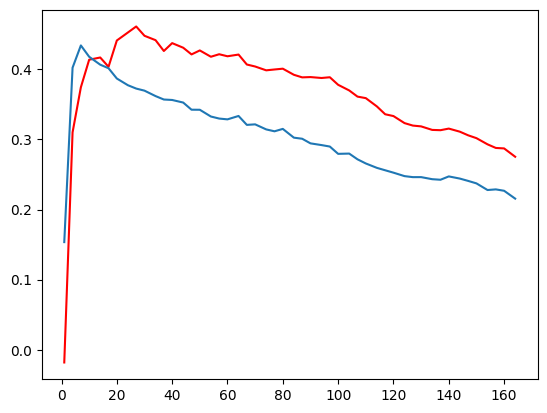

In [ ]:
#Se grafican lo sesultados obtenidos en la prueba y en el entrenamiento.
#En este caso son una serie que se generan del entrenamiento.
#La parte más alta de la gráfica mostrará el k óptimo a emplear para lograr que el
#modelo adquiera su máxima optimización.

plt.plot(k_value, score_prueba_lista, color= 'red')
plt.plot(k_value, score_entrenamiento_lista)

In [ ]:
#Como en la gráfica no se aprecia ese k. Las siguiens instrucciones
#permiten listar en orden de mayor a menor de esos k con los que se entrenó y probó
#el modelo.

resultados= pd.DataFrame({'k': k_value,
                         'score_prueba': score_prueba_lista,
                         'score_entrenamiento': score_entrenamiento_lista})
resultados.sort_values(by= 'score_prueba', ascending= False)

#Árbol de decisión

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
categorical_features=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus']

categorical_transformer= Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown= 'ignore'))])

preprocessor= ColumnTransformer(
    transformers= [('cat', categorical_transformer, categorical_features)]
)

regressor_vecinos= KNeighborsRegressor(n_neighbors=27) #el atributo n_neighbors es el k de la presentación
pipeline_vecinos= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('MODEL', regressor_vecinos)
])

regressor_arbol= DecisionTreeRegressor() #el atributo n_neighbors es el k de la presentación
pipeline_arbol= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('MODEL', regressor_arbol)
])



pipeline_vecinos.fit(X_train, y_train)
pipeline_arbol.fit(X_train, y_train)


predicciones_vecinos = pipeline_vecinos.predict(X_test)
predicciones_arbol = pipeline_arbol.predict(X_test)

score_vecinos = r2_score(y_test, predicciones_vecinos)
score_arbol = r2_score(y_test, predicciones_arbol)

print("Coeficiente de determinación R² - Vecinos más cercanos:", score_vecinos)
print("Coeficiente de determinación R² - Árbol de decisión:", score_arbol)



# Ajustar los modelos a los datos de entrenamiento

# Calcular el coeficiente de determinación R² para los modelos de vecinos más cercanos y árbol de decisión


Coeficiente de determinación R² - Vecinos más cercanos: 0.4611234795447834
Coeficiente de determinación R² - Árbol de decisión: 0.3160676478012534


In [ ]:
pipeline_arbol.named_steps['MODEL'].get_depth()

8

In [ ]:
pipeline_arbol.named_steps['MODEL'].feature_importances_

array([0.10021463, 0.01048841, 0.03972546, 0.06257203, 0.12178203,
       0.0163927 , 0.04843746, 0.        , 0.35259171, 0.        ,
       0.03201492, 0.06996561, 0.02623405, 0.05170796, 0.06787301])

In [ ]:
nombres_caracteristicas_transformadas = pipeline_arbol.named_steps['preprocessor'].transformers_[0][1]\
    .named_steps['onehot'].get_feature_names_out(input_features=categorical_features)

nombres_caracteristicas= list(nombres_caracteristicas_transformadas)
importancias_variables= pipeline_arbol.named_steps['MODEL'].feature_importances_

diccionario_importancias= dict(zip(nombres_caracteristicas, importancias_variables*100))

for caracteristica, importancia in diccionario_importancias.items():
  print(f'Variable: {caracteristica}, Importancia: {importancia}')



Variable: mainroad_no, Importancia: 10.021463205605723
Variable: mainroad_yes, Importancia: 1.0488408109830234
Variable: guestroom_no, Importancia: 3.9725463628684308
Variable: guestroom_yes, Importancia: 6.2572032469544165
Variable: basement_no, Importancia: 12.178203472076756
Variable: basement_yes, Importancia: 1.6392703288989694
Variable: hotwaterheating_no, Importancia: 4.843746469191255
Variable: hotwaterheating_yes, Importancia: 0.0
Variable: airconditioning_no, Importancia: 35.25917092872008
Variable: airconditioning_yes, Importancia: 0.0
Variable: prefarea_no, Importancia: 3.2014920406294682
Variable: prefarea_yes, Importancia: 6.99656119138023
Variable: furnishingstatus_furnished, Importancia: 2.6234051254982176
Variable: furnishingstatus_semi-furnished, Importancia: 5.170795828631751
Variable: furnishingstatus_unfurnished, Importancia: 6.787300988561684


Text(0.5, 1.0, 'Importancia de las variables en el modelo de árbol de decisión')

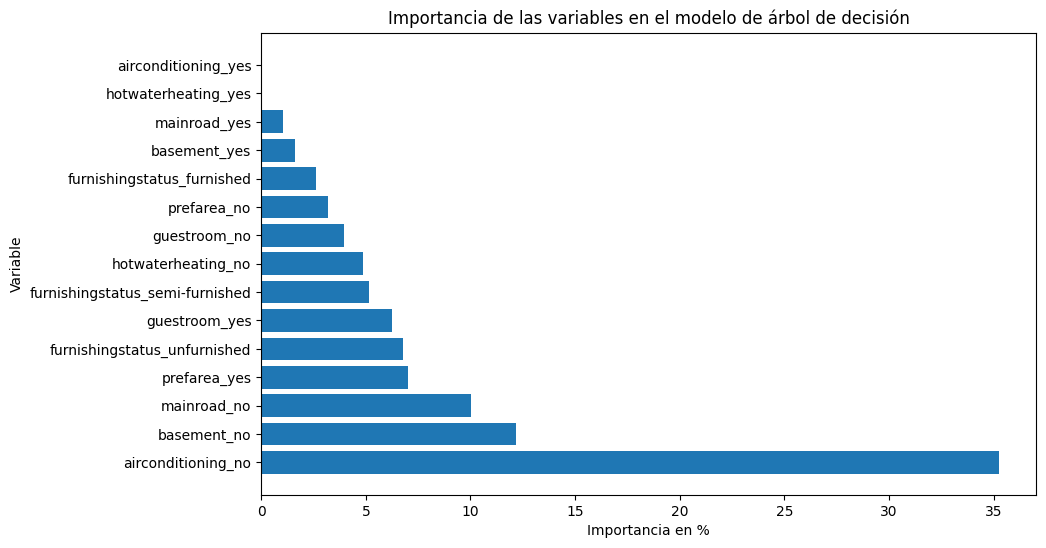

In [ ]:
diccionario_importancias_ordenado= dict(sorted(diccionario_importancias.items(), key= lambda x: x[1], reverse= True))
nombres_caracteristicas_ordenadas= list(diccionario_importancias_ordenado.keys())
importancias_ordenadas= list(diccionario_importancias_ordenado.values())

plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas_ordenadas, importancias_ordenadas)
plt.xlabel('Importancia en %')
plt.ylabel('Variable')
plt.title('Importancia de las variables en el modelo de árbol de decisión')

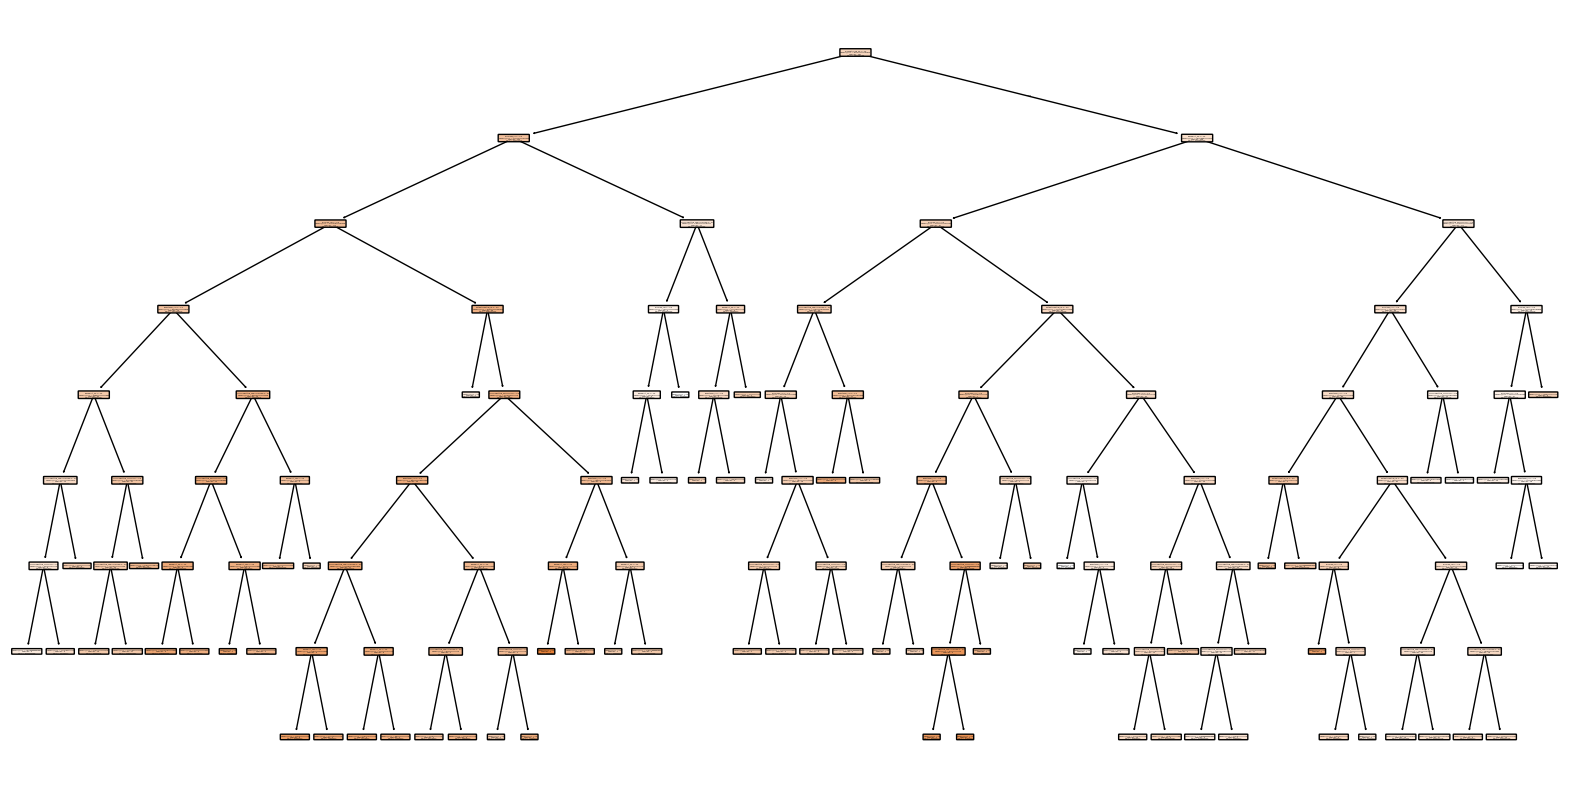

In [ ]:
from sklearn.tree import plot_tree
arbol_decision= pipeline_arbol.named_steps['MODEL']
plt.figure(figsize=(20, 10))
plot_tree(arbol_decision, feature_names= nombres_caracteristicas, filled= True, rounded= True)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(arbol_decision,
    out_file= 'tree.dot',
    feature_names= nombres_caracteristicas,
    impurity= False,
    filled= True,)


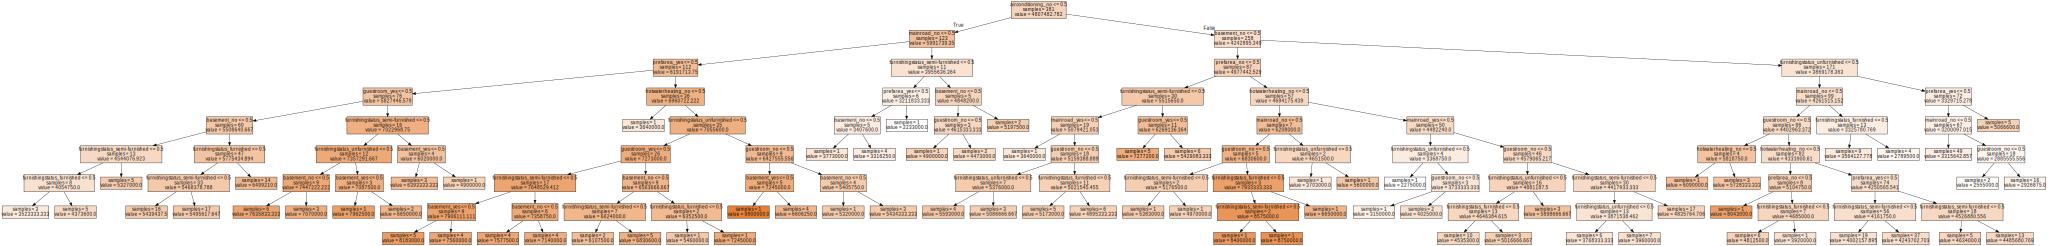

In [ ]:
import graphviz

with open( 'tree.dot') as f:
  dot_graph= f.read()
  display(graphviz.Source(dot_graph))
